### Instructions before starting - only if you are using Google's colab

If you want to use your own data files with colab, you need to specifically upload them. In previous TP you saw one way of doing it via command line, but the following works too. The next code block when executing will create a "browse" button, from which every time you run it you can use it to load data files. 

In [77]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving depense_etat.txt to depense_etat (1).txt
User uploaded file "depense_etat.txt" with length 2280 bytes


All your data files loaded this way will be in folder "/content", where also you are at the moment. So if in exercises you need to specify data path, just leave that variable as empty string, "". To check that this really is so, with following you can list all the files in the current directory you are in: 

In [ ]:
!ls

sample_data


# TP3 - PCA

This TP introduces [principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) (L'analyse en composantes principales, ACP en français), a well-known and widely used dimensionality reduction method. The idea in PCA is to find the directions of maximal variance in data, and consider only those while discarding all the rest of the variations. 

This notebook begins with very simple preliminary analysis on very simple data, then giving you a chance to implement PCA yourself and finally gives exercises where you shall analyze more interesting real-worl data with it. 

All the questions I'm expecting to find some sort of answer (either by code implementation and its output or text you have written) are marked with **QN** where N is the number of the question. If the required answer is code, you should write it directly below the question, If it is not code, I've put **AN** somewhere below the question, and you should write your answer there. 

## Preliminaries

This section builds up some preliminary analysis to get some unerstanding on how PCA works.
Let us consider the following data blob:

In [74]:
import numpy as np
import matplotlib.pyplot as plt

In [75]:
covmat = [[1, 0.75],[0.75, 1]]
n_samples = 500
X = np.random.multivariate_normal([0,0], covmat, n_samples) 
print(X.shape)

(500, 2)


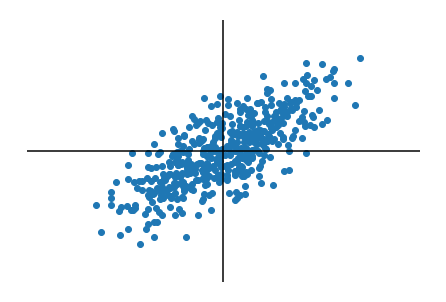

In [76]:
# create new figure
fig = plt.figure(1)
# these two lines take care of figure axes: I think the picture is prittier without them
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
# now the data as scatter plot
plt.scatter(X[:,0], X[:,1])
# and x and y axes
plt.hlines(0, -4, 4)
plt.vlines(0, -4, 4)
# show the plot
plt.show()

**Q1** What is the sample covariance matrix for the data? 
What are the eigenvectors and corresponding eigenvalues on 
a) real covariance where the data was created and 
b) sample covariance? Plot the eigenvectors above the data blob. 

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
[0.25 1.75]


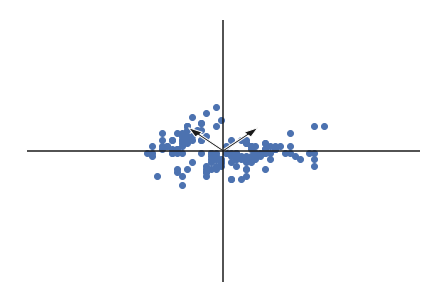

In [180]:


fig = plt.figure(1)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.scatter(X[:,0], X[:,1])
plt.hlines(0, -4, 4)
plt.vlines(0, -4, 4)


#eigevectors & eigenvalues corresipondind to the matrix real covariance
eigvals, eigvecs = np.linalg.eigh(covmat)


for comp in eigvecs :
  plt.arrow(0, 0, comp[0], comp[1], width=0.05, head_width=0.2, facecolor='k', length_includes_head=True)
print(eigvals)
# show the plot for the real cov
plt.show()







[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


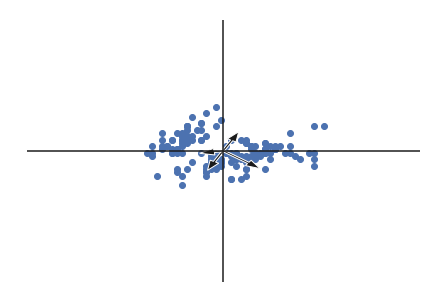

In [187]:
plt.figure().clear()


print(covar)
fig = plt.figure(1)
ax = fig.add_axes([0, 0, 1, 1])
ax.axis('off')
plt.scatter(X[:,0], X[:,1])
plt.hlines(0, -4, 4)
plt.vlines(0, -4, 4)


#sample covariance matrix for our data
covar = np.cov(X.T)

#eigenvectors and corresponding eigenvalues for the sample cov
eigsval_sample, eigvecs_sample = np.linalg.eigh(cov_sample)
for x in eigvecs_sample :
  plt.arrow(0, 0, x[0], x[1], width=0.05, head_width=0.2, facecolor='k', length_includes_head=True)
plt.show()

**Q2** What does the data look like when projected to the first principal component?  
Remember that the to project the data into $m$ most influential directions: 
1. Take $m$ most significant components into a matrix: $\mathbf{W} = \begin{bmatrix} \text{pc}_1 & \text{pc}_2 & \cdots & \text{pc}_m \end{bmatrix}$
2. Calculate transformed data: $\underbrace{\hat{\mathbf{X}}}_{n\times m} = \underbrace{\mathbf{X}}_{n\times d}\underbrace{\mathbf{W}}_{d\times m} $

In [ ]:
# the function projection do the job , k is the number of components (m)



def projection(X,eigenvectors,k):
  W = eigenvectors[:k]

  Xchap = X.dot(W.T)

  print(Xchap.shape)
  return Xchap


Xchap = projection(X,eigvecs,1)
print(X.shape)

(500, 1)
(500, 2)


In [188]:
#variance explained  wich is based on the eigvalues


tot = sum(eigvals)
var_exp = [(i / tot)*100 for i in sorted(eigvals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print(var_exp)


[87.5, 12.5]


## PCA - algorithm

Now you should have an understanding on how PCA works. 

**Q3** Fill in the PCA function below

In [196]:
import numpy as np

def my_pca(X, n_components): # assume data is given n*d 
    
    covar = np.cov(X.T)
    print('matrice de covariance de taille: ' , covar.shape)
    eigenValues, eigenVectors = np.linalg.eig(covar)


    # Ordering the eigenvalues/ eigenvectors
    idx = eigenValues.argsort()[::-1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]


    #condition on the number of components of the new space
    if n_components > X.shape[1] : 
      raise("C'est un algo de réduction de nb de features !!!")
    else :
      
      W = eigenVectors[:, :n_components]   # Works nickel 
      Xnew = X.dot(W)

      
    #explained variance
    tot = sum(eigvals)

    var_explained = [(i / tot)*100 for i in sorted(eigvals, reverse=True)]

    print("The explained Variance for the",n_components,"first component is ", var_explained)
    
    # should return data transformed to n_components and the percentage of variance explained by each component
    return Xnew, var_explained 


**Q4** Test your function with following well-known [Iris flower dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). What does the data look like when projected on two most significant principal components? How large portion of the variance in the data do they explain? How long does it take to run PCA with your code?

In [200]:
from sklearn.datasets import load_iris

data = load_iris()
#print(data.keys())  # data  is dictionary object
#print(data['data'].shape)  # we are interested in field 'data', we have n=150 samples and dimensionality d=4
iris_data = data['data']

# Remember that the data should be centered!
col_mean = np.mean(iris_data, axis=0)  # means of the four columns 
# (ok could have named this as row_mean, too, because it is a mean over all rows, length 4)
print(col_mean)  # not zero! need to subtract this from all rows
for ii in range(iris_data.shape[0]):
    iris_data[ii,:] -= col_mean
print(np.mean(iris_data, axis=0))  # close enough

# implement the pca calculations here for measuring how long the execution of your takes, you can use the following:







[5.84333333 3.05733333 3.758      1.19933333]
[-1.12502600e-15 -7.60872846e-16 -2.55203266e-15 -4.48530102e-16]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead



matrice de covariance de taille:  (4, 4)
The explained Variance for the 2 first component is  [87.5, 12.5]
time elapsed: 0.0035579999999981737


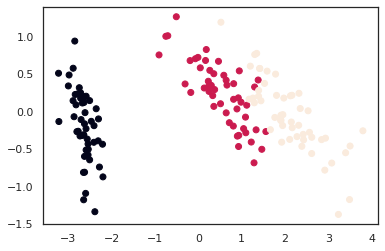

In [202]:
import time
t = time.clock() 
X = iris_data
iris_new ,Var_explained = my_pca(iris_data, 2 )
print("time elapsed:",time.clock()-t)  # get the time difference from the start to this moment

fig = plt.figure()
plt.scatter(iris_new[:,0], iris_new[:,1], c=data['target'])  
plt.show()





```
# This is formatted as code
```

**A4** My function took 0.0032 to do the job, he two features explains 87.5 of the variance of our data.

Python also implements PCA routine with [scikit learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). **Q5** Test it on the previous data set and comment the results. Is the result same? (Hint: should be!) How long did it take for this implementation to solve the problem?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning:

time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead



time elapsed: 0.001414999999994393
Explained variance: [0.92461872 0.05306648]


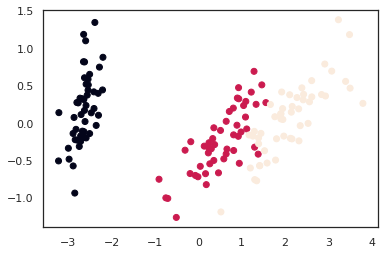

In [198]:
from sklearn.decomposition import PCA
t = time.clock() 
# the PCA in sklearn is an object, so we need to initialize it first:
pca_solver = PCA(2)  # we can specify number of desired components here in initialization 

# then we fit the solver to our data and transform it:
iris_new2 = pca_solver.fit_transform(iris_data)
print("time elapsed:",time.clock()-t)  # get the time difference from the start to this moment

# this variable contains a list of explained variances 
print("Explained variance:", pca_solver.explained_variance_ratio_)  

# if we need principal components we could access them from pca_solver.components_

# and then let's plot as before
fig = plt.figure()
plt.scatter(iris_new2[:,0], iris_new2[:,1], c=data['target'])  
plt.show()



```
# This is formatted as code
```

**A5** sklearn package took 0.0014 s to do the job, wich is x3 faster than my function.

You should have seen that python's implementation is much faster than your own. Because for that and for avoiding any bugs in your own implementation we will be usingn the Python's version from now on. It is a good exercise when studying a new topic to implement your own code but in practice we should not reinvent the wheel. 

Often it is a good idea to preprocess the data before applying PCA with [sklearn's scale function](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html). We have seen previously that PCA requires centered data, but often centering alone is not enough. One intuitive example is that if the dataset contains length measurements the results of PCA would change radically if the unit were to be meters instead of mm. This is often behaviour we do not want (but sometimes we might! All depends on your data..). One example how using or not using preprocessing affects your results can be found at this [sklearn's example](http://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html). 

The preprocessing we use is called standardization, and the point is to (subtract the mean and) divide the data variables with their standard deviations. (Standard deviation is the square root of variance: although there is a connection we are not normalizing the variances of the data! That would be called whitening.) Intuitively we will be using correlation in PCA instead of covariance, see for example [this Wikipedia article](https://en.wikipedia.org/wiki/Covariance_and_correlation).

**Q6** Is the result of applying PCA the same on standardized iris data than non-standardized? What has changed? Which one do you think is better?

[-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]
[1. 1. 1. 1.]
Explained variance: [0.72962445 0.22850762]
(150, 2)


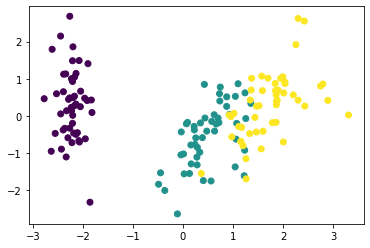

In [84]:
from sklearn import preprocessing 

data = load_iris()
iris_data = data['data']
# Center to the mean and component wise scale to unit variance, along the four variables
iris_scaled = preprocessing.scale(iris_data,axis=0)

print(np.mean(iris_scaled, axis=0))  # column mean
print(np.std(iris_scaled, axis=0))  # column std

pca_solver = PCA(2) 
iris_new3 = pca_solver.fit_transform(iris_scaled)
print("Explained variance:", pca_solver.explained_variance_ratio_)  
print(iris_new3.shape)

# and then let's plot as before
fig = plt.figure()
plt.scatter(iris_new3[:,0], iris_new3[:,1], c=data['target'])  
plt.show()



```
# This is formatted as code
```

**A6** Scaling just changes the range of the dataset, and  Standardizing tend to be more radical transformation because it aims to change your samples so that they can be described as a normal distribution.

## Analyzing data with PCA 

### Dataset 1 - French state expences

The data is in file "depense_etat.txt", and contains the expences of French governement from 1872 to 1971 divided into following categories: 
* ACO : anciens combattants,
* ACS : Action Sociale
* AGR : agriculture,
* CMI : commerce et industrie,
* DEF : défense,
* DET : dette,
* DIV : divers.- PVP : pouvoirs publics,
* EDU : éducation et culture,
* LOG : logement et aménagement du territoire,
* TRA : transports

You can download and print the data as follows:

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

data_source = '/content/'  # you'll probably need to change this based on where you saved the data!
filename = 'depense_etat.txt' 
filepath = os.path.join(data_source, filename)

df = pd.read_csv(filepath, delimiter="\s+")

attribute_names = df.columns
object_names = df.index
dataset = df.values

print(attribute_names, len(attribute_names))
print(object_names, len(object_names), "\n")

print(dataset)

Index(['PVP', 'AGR', 'CMI', 'TRA', 'LOG', 'EDU', 'ACS', 'ACO', 'DEF', 'DET',
       'DIV'],
      dtype='object') 11
Int64Index([1872, 1880, 1890, 1900, 1903, 1906, 1909, 1912, 1920, 1923, 1926,
            1929, 1932, 1935, 1938, 1947, 1950, 1953, 1956, 1959, 1962, 1965,
            1968, 1971],
           dtype='int64') 24 

[[18.   0.5  0.1  6.7  0.5  2.1  2.   0.  26.4 41.5  2.1]
 [14.1  0.8  0.1 15.3  1.9  3.7  0.5  0.  29.8 31.3  2.5]
 [13.6  0.7  0.7  6.8  0.6  7.1  0.7  0.  33.8 34.4  1.7]
 [14.3  1.7  1.7  6.9  1.2  7.4  0.8  0.  37.7 26.2  2.2]
 [10.3  1.5  0.4  9.3  0.6  8.5  0.9  0.  38.4 27.2  3. ]
 [13.4  1.4  0.5  8.1  0.7  8.6  1.8  0.  38.5 25.3  1.9]
 [13.5  1.1  0.5  9.   0.6  9.   3.4  0.  36.8 23.5  2.6]
 [12.9  1.4  0.3  9.4  0.6  9.3  4.3  0.  41.1 19.4  1.3]
 [12.3  0.3  0.1 11.9  2.4  3.7  1.7  1.9 42.4 23.1  0.2]
 [ 7.6  1.2  3.2  5.1  0.6  5.6  1.8 10.  29.  35.   0.9]
 [10.5  0.3  0.4  4.5  1.8  6.6  2.1 10.1 19.9 41.6  2.3]
 [10.   0.6  0.6  9.   1.   8.1  

**Q7** Can you infer anything about the data from correlations between variables and objects in this data set (code implemented for you below)? 

In [89]:
def my_correlation_function(data, attr_names):
    # get correlation coefficients, function considers rows as attributes
    crl = np.corrcoef(data)  # transpose of data -> correlation among attributes
    print(crl)
    # sort the correlations and name them for easier interpretation
    sorted_crls = []
    for ii in range(data.shape[0]):
        for jj in range(ii + 1, data.shape[0]):
            sorted_crls.append((crl[ii, jj], attr_names[ii],attr_names[jj]))
    sorted_crls.sort(key=lambda x: abs(x[0]))
    sorted_crls.reverse()
    for cor in sorted_crls:
        print(cor)

# get correlations between attributes:
my_correlation_function(dataset.T, attribute_names)
print(object_names)
my_correlation_function(dataset, object_names)

Int64Index([1872, 1880, 1890, 1900, 1903, 1906, 1909, 1912, 1920, 1923, 1926,
            1929, 1932, 1935, 1938, 1947, 1950, 1953, 1956, 1959, 1962, 1965,
            1968, 1971],
           dtype='int64')


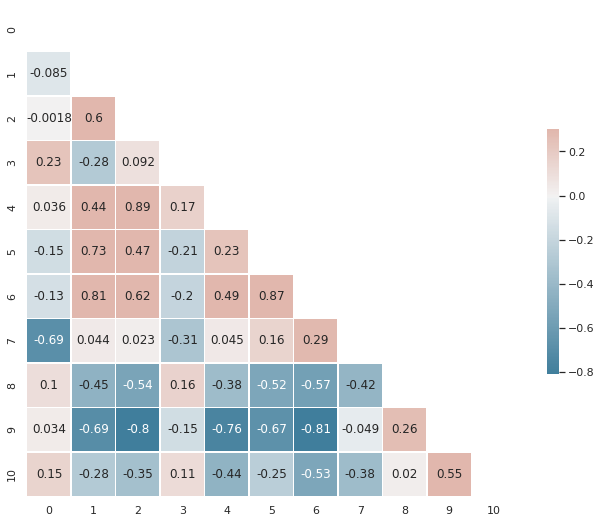

In [204]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")
corr = np.corrcoef(dataset.T)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

**A7** 
We can see that the variables are highly correlated, i.e. are not independent, and we will need to apply a linear model of independent variables.

The use of the PCA aims to take the vectors that maximize the variance and in other words provide a space of decorrelated features.






**Q8** Apply PCA to standardized dataset in order to analyze which years have been similar (in the sense of budget). Determine how many components should you use for visualization?

(24, 11)
(24, 3)
Explained variance: [0.45212415 0.18635779 0.11726579]


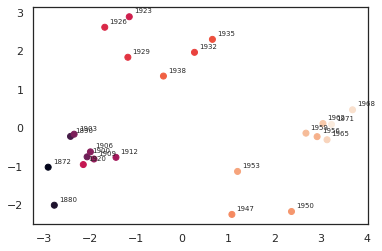

In [115]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

dataset_scaled = preprocessing.scale(dataset,axis=0)
print(dataset_scaled.shape)

pca = PCA(3) 
new_data = pca.fit_transform(dataset_scaled)
print(new_data.shape)

print("Explained variance:", pca.explained_variance_ratio_)
fig = plt.figure()
plt.scatter(new_data[:,0], new_data[:,1], c=object_names)  
for ind in range(new_data.shape[0]):

  plt.text(new_data[ind,0]+0.1, new_data[ind,1]+0.1, object_names[ind], fontsize=7)

plt.show()

**A8** 
Doing the PCA with 2 or 5 components, will not change much, since the explained variance of the first and the second component are the majority.

We can see that on the projected space (space with two features), the 20's and early 30's are more similar, and the same for the late 50's and early 60's.
*italicized text*

**Q9** Can you see anything interesting in correlations between new and old variables? Consider the code below that plots the components as bar plots. What can you see?

In [116]:
correlations = np.array([[np.corrcoef(new_data[:, c].T, dataset_scaled[:, attr])[0, 1] 
                                            for c in range(len(pca.explained_variance_ratio_))]
                                          for attr in range(len(pca.explained_variance_ratio_))])

figure, axes = plt.subplots(1, len(correlations), figsize=(20,10))
for ii in range(len(attribute_names)):
    axes[ii].set_title("Axes " + str(ii))
    axes[ii].bar(range(len(attribute_names)), correlations[:, ii])
    axes[ii].set_ylim(-1, 1)
plt.show()

print(attribute_names)

array([0.45212415, 0.18635779, 0.11726579])



```
# This is formatted as code
```

**A9** J'ai pas bien compris la question, mais je vois que les échantillons sur l'espace projetées sont plus séparables sur l'espace nouveau.

**Q10** Next project the data to the most important principal components you found (if you found more than two you can do it in pairs of two components). What conclusions can you draw from the visualization?

(24, 11)
(24, 2)
Explained variance: [0.45212415 0.18635779]


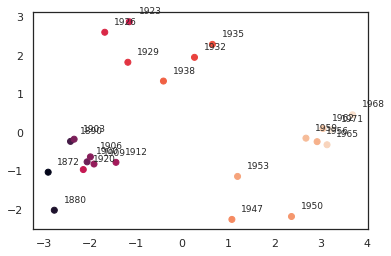

In [105]:



dataset_scaled = preprocessing.scale(dataset,axis=0)
print(dataset_scaled.shape)

pca = PCA(2) 
new_data = pca.fit_transform(dataset_scaled)
print(new_data.shape)

print("Explained variance:", pca.explained_variance_ratio_)
fig = plt.figure()
plt.scatter(new_data[:,0], new_data[:,1], c=object_names)  
for ind in range(new_data.shape[0]):

  plt.text(new_data[ind,0]+0.2, new_data[ind,1]+0.2, object_names[ind], fontsize=9)

plt.show()

#### Correlation circle

We can represent our data in a space given by principal components. Can we do the same for our variables? You guessed it, the answer is yes!

Consider two principal components, $pc1$ and $pc2$. A data point from the original space, $x$, is projected to the new space spanned by these components by multiplying it with matrix $[pc1 \; pc2]$ (or with each individual principal component and stacking the results into a vector). Now for variables the projections can be directly taken as rows of $[pc1 \; pc2]$.

When we plot these transformed variables we can deduce correlations among them. If two variables point to the same direction then they are correlated. If they point to opposite directions they are negatively correlated. For 90 degree angle we can say that the variables are not correlated. Note that the length of the line (how close it is to the unit circle line) indicates how well the variable is represented in this transformation to the two principal components chosen. So if the lines are very short, no conclusions should be drawn. 

In [ ]:
print(pca.components_.shape)

(2, 11)


[-0.07783386  0.36703067  0.37379156 -0.06150644  0.3235781   0.35282174
  0.41848234  0.12957308 -0.27458025 -0.39852348 -0.24578306]
[-0.51668105 -0.00413325 -0.23762481 -0.44040821 -0.27778142  0.09533984
  0.07018239  0.56403536 -0.15096522  0.21055979 -0.0784799 ]


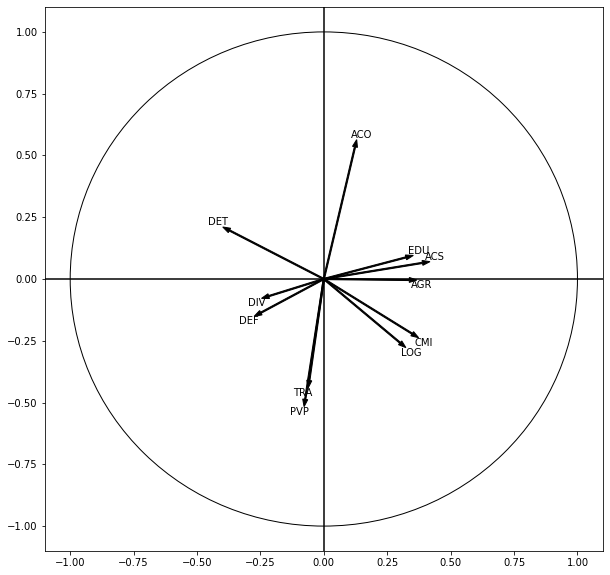

In [ ]:
def plot_pca_correlation_circle(pc1,pc2,names):
    
    plt.figure(figsize=(10,10))
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False)
    ax = plt.gca()
    ax.cla() # clear things for fresh plot
    ax.add_artist(circle1)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')

    for i, (x, y) in enumerate(zip(pc1, pc2)):
        plt.arrow(0, 0, x, y, width=0.005, head_width=0.02, facecolor='k', length_includes_head=True)
        plt.text(x+np.sign(x)*0.02, y+np.sign(y)*0.02, names[i], verticalalignment="center", horizontalalignment ="center")
        
    plt.axis((- 1.1,  1.1, - 1.1, + 1.1))
    plt.show()
    
print(pca.components_[0,:])
print(pca.components_[1,:])

plot_pca_correlation_circle(pca.components_[0,:], pca.components_[1,:], attribute_names)

**Q11** What sort of correlations are there in these variables when projected to the first two principal axes?

**A11** 
On voit que l'arrow ACO est de sens opposé à la variable PVP et TRA, ce qui signifie qu'ils sont corrélés négativement.

pour PVP et TRA ils sont corrélés positivement.


### Dataset 2 - of your choice

**Q12** Consider one of the provided datasets (nobels, tennis, patrimoi or fume). Perform the same type of analysis as for the previous state expenses dataset: identify the principal components and interpret them; project data to the principal component axis and visualize the similarities/dissimilarities between the objects. Comment your results.

In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data_source = '../data/'  # you'll probably need to change this!
filename = 'patrimoi.txt'
filepath = os.path.join(data_source, filename)

df = pd.read_csv(filepath, delimiter="\s+")
print(df, "\n")

### Dataset 3 - faces

We will consider a face dataset. You can access it as follows. (Note: this downloads it from internet! Another option if you are working on ECMs computers is to check the folder indicated below and use the data home folder as indicated below, in comments.)

In [117]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.datasets import fetch_lfw_people


lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [157]:
people_names

array(['Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       'Gerhard Schroeder', 'Hugo Chavez', 'Tony Blair'], dtype='<U17')

Some information about the images:

In [130]:
images = lfw_people.data # list of images
num_images, height_image, width_image = lfw_people.images.shape
people_names = lfw_people.target_names
people_by_image = [people_names[lfw_people.target[index]] for index in range(num_images)]

print("nombre images : ", num_images)
print("dimension images : ", height_image, width_image, height_image*width_image, "\n")

for nn in people_names:
    print(nn)
    
print()

for index in range(num_images):
    print("image", index, "name :", people_by_image[index])

nombre images :  1288
dimension images :  50 37 1850 

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair

image 0 name : Hugo Chavez
image 1 name : Tony Blair
image 2 name : George W Bush
image 3 name : Colin Powell
image 4 name : Ariel Sharon
image 5 name : Colin Powell
image 6 name : George W Bush
image 7 name : Gerhard Schroeder
image 8 name : George W Bush
image 9 name : Ariel Sharon
image 10 name : George W Bush
image 11 name : Donald Rumsfeld
image 12 name : George W Bush
image 13 name : Colin Powell
image 14 name : Gerhard Schroeder
image 15 name : George W Bush
image 16 name : George W Bush
image 17 name : George W Bush
image 18 name : George W Bush
image 19 name : George W Bush
image 20 name : George W Bush
image 21 name : George W Bush
image 22 name : Hugo Chavez
image 23 name : George W Bush
image 24 name : Tony Blair
image 25 name : Hugo Chavez
image 26 name : Tony Blair
image 27 name : Hugo Chavez
image 28 name : Donald Rumsfe

Each image is a grayscale vector of size height$\times$width. You can take a look at the faces like this:

(1850,)


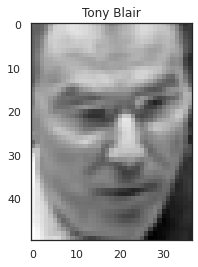

In [125]:
print(images[51].shape)

plt.figure()
plt.title(people_by_image[42])
plt.imshow(images[42].reshape((height_image, width_image)), cmap=plt.cm.gray)
plt.show()

#### PCA on images

Let us perform PCA on the images. We will consider 50 new dimensions. 

Normalize the greyscale for all the images with the method you think is the best (below some options). Note that now it might make more sense (as we are talking about image data) to normalize each object, or image, to be in certain range. 

(1288, 1850)
0.0
1.0


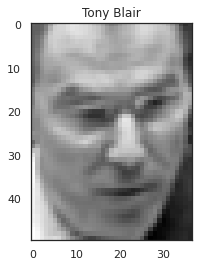

[0.3953846  0.38615385 0.4076923  ... 0.14923078 0.16769232 0.13384615]
1.0


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


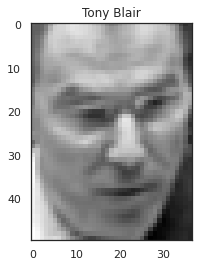

[-0.74623543 -0.7949906  -0.6812286  ... -2.0463736  -1.9488633
 -2.1276326 ]


In [126]:
from sklearn import preprocessing 

print(images.shape)

#scaling
images_scaled = preprocessing.MinMaxScaler().fit_transform(images.T).T


Next the PCA. Let us first look at the variance explained by the first 50 components. **Q13** What do you think, will the the projections be good with this amount of components?

In [165]:
from sklearn.decomposition import PCA 
import plotly.express as px  # plotting package that I found online (never workeed with this one)

pca_img = PCA(50)
images_scaled = preprocessing.MinMaxScaler().fit_transform(images.T).T
transformed_images = pca_img.fit_transform(images_scaled) 
# let's take a little second to visualize the  cumulative expalianed variance for our 50 ACP features : 

exp_var_cumul = np.cumsum(pca_img.explained_variance_ratio_)
print(exp_var_cumul)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

[0.23189794 0.37496    0.4339268  0.48653606 0.5348514  0.563741
 0.5880461  0.6079987  0.62750983 0.6460767  0.6621621  0.67674696
 0.6884874  0.69909817 0.70925856 0.7187344  0.7276033  0.73624676
 0.7442229  0.75133765 0.7580799  0.76448333 0.7705572  0.7763094
 0.7816293  0.78670233 0.7916256  0.7963121  0.80075353 0.8048629
 0.8087003  0.8123205  0.81573975 0.8191486  0.82241714 0.8255548
 0.82866234 0.83161664 0.83450145 0.83723205 0.8399513  0.8425837
 0.845132   0.8476205  0.8499438  0.85224533 0.8545344  0.85673463
 0.8589235  0.8610694 ]



**A13** 
We can see thecumulative sum of the  variance which is explained by these 50 features is around  86% which is relatively not good enough (we can be more performant on this task (different details could lead the model to fail)), 

#### Importance of a principal component for observation - squared cosine

The squared cosine measure gives the importance a principal component has for a given observation. Remember that principal components are vectors whose length is the original dimensionality of the data, or the dimensionality of the observations. (So if I have $n$ observations with dimension $d$, the principal components I obtain will also be of dimension $d$, and I choose some amount of them and that will be the new data dimensionality.) We can measure the similarity of a pc and an observation with a squared cosine measure. 

Denote observation as $a$ and a pc as $b$. We see that $\cos^2(a,b) = (\frac{a\cdot b}{\|a\|\|b\|})^2 = \frac{(a\cdot b)^2}{\|a\|^2}$ in our case because any pc has length of one (by definition) and thus $\|b\|=1$. Now we see that for calculating squared cosine distance, we need firstly squared norm of our observation, and secondly squared inner product of our observation with a principal component. The first one is easy and simple to do. As for the second one, remember how we calculated our transformed data? That's right: they are just what we need, products between original objects and principal components. 

Below is the function for calculating the suqared cosine distances as described here. The output is a matrix whose size is number of objects (n) times number of principal components considered. 

Note that if we have normalized each object to have norm of 1 the squared cosine similarities are straight away only the inner procucts between data observation and a pc. This is why we normalized the data previously, to make the similarities more intuitive. As stated previously, data normalization before pca is wholly up to the user and what she/he thinks is best. 

In [137]:

def my_cos_fun(initial_data, transformed_data):
    # assumes initial data n*d, transformed data n*d2 
    squared_norms = np.apply_along_axis(np.linalg.norm, 1, initial_data)**2
    # print(squared_norms.shape)  # n
    projection_quality_cos = np.array([[x*x / squared_norms[ii] for x in line] 
                                   for ii, line in enumerate(transformed_images)])
    # print(projection_quality_cos.shape)  # n*50, 50 is the number of principal components chosen before
    return projection_quality_cos

cos_q = my_cos_fun(images_scaled, transformed_images)

# print results:
from math import acos, pi
for index in range(num_images):
    cos2sum = sum(cos_q[index])
    print("%3d   qualite (cos^2) %6.4f  " %(index, cos2sum))
    
    # summing all the cosine similarities for this image to get an overall similarity measure to the pcs considered
    # the angle is the combined angle from sum of cosine values

  0   qualite (cos^2) 0.0736  
  1   qualite (cos^2) 0.0692  
  2   qualite (cos^2) 0.0905  
  3   qualite (cos^2) 0.0949  
  4   qualite (cos^2) 0.0539  
  5   qualite (cos^2) 0.1255  
  6   qualite (cos^2) 0.1004  
  7   qualite (cos^2) 0.0796  
  8   qualite (cos^2) 0.1640  
  9   qualite (cos^2) 0.0669  
 10   qualite (cos^2) 0.0491  
 11   qualite (cos^2) 0.2192  
 12   qualite (cos^2) 0.0858  
 13   qualite (cos^2) 0.0679  
 14   qualite (cos^2) 0.0731  
 15   qualite (cos^2) 0.1764  
 16   qualite (cos^2) 0.1087  
 17   qualite (cos^2) 0.0930  
 18   qualite (cos^2) 0.0504  
 19   qualite (cos^2) 0.0846  
 20   qualite (cos^2) 0.0804  
 21   qualite (cos^2) 0.0483  
 22   qualite (cos^2) 0.1191  
 23   qualite (cos^2) 0.0823  
 24   qualite (cos^2) 0.0864  
 25   qualite (cos^2) 0.2178  
 26   qualite (cos^2) 0.0677  
 27   qualite (cos^2) 0.0466  
 28   qualite (cos^2) 0.0677  
 29   qualite (cos^2) 0.0735  
 30   qualite (cos^2) 0.0522  
 31   qualite (cos^2) 0.0655  
 32   qu

####  New axes as prototype images (eigenfaces)

The PCA axes are directions that maximize variance. When applying to faces, we get very intuitive results. **Q14** Extract the first one and plot it. How can you explain this?

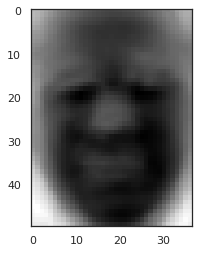

In [155]:
# find the first pc
pc1 = pca_img.components_[0,:] #first component 

plt.imshow(pc1.reshape((height_image, width_image)), cmap=plt.cm.gray)
plt.show()
#Ce visage incorpore plusieurs caracteristiques qui décrivent le visage humain (nez yeux bouche).


**A14** 
we have a result that was intuitive because the most basic features of human faces are incorporated in this face.

We can say that human faces are essentially constructed from a mixture of "common faces" and the first components, since they maximize the variance of the dataset, detect these common faces.



Plot the twelve first axis with code below. **Q15** Any comments on this?

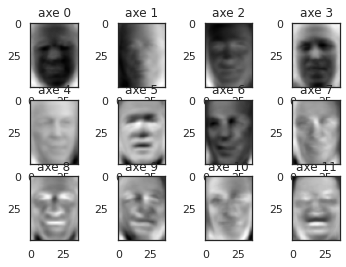

In [156]:
figure, axes = plt.subplots(3, 4)
face_pcs = pca_img.components_[0:12,:]
for ll in range(3):  # lines
    for cc in range(4):  # columns
        axes[ll][cc].set_title("axe " + str(ll * 4 + cc))
        axes[ll][cc].imshow(face_pcs[ll * 4 + cc, :].reshape((height_image, width_image)), cmap=plt.cm.gray)

plt.show()

**A15** 

We see that the first 12 component gathers all the faces of people present in the dataset('Ariel Sharon', 'Colin Powell', 'Donald Rumsfeld', 'George W Bush',
       Gerhard Schroeder', Hugo Chavez', Tony Blair')
       

#### Approximate images

Let us look at what the faces will look like when projected to the first 50 principal components. **Q16** Should this work? (How much of the cumulative variance in the faces these 50 axes represent?) 

In [164]:
exp_var_cumul = np.cumsum(pca_img.explained_variance_ratio_)
exp_var_cumul
# these features explains 86.01% of the variance of our data.


array([0.23189788, 0.37495977, 0.43392664, 0.4865359 , 0.53485125,
       0.56374097, 0.588046  , 0.6079986 , 0.6275097 , 0.64607656,
       0.662162  , 0.67674685, 0.68848723, 0.699098  , 0.7092584 ,
       0.7187342 , 0.72760314, 0.7362466 , 0.7442227 , 0.75133747,
       0.7580797 , 0.76448315, 0.77055705, 0.7763092 , 0.78162915,
       0.78670216, 0.79162544, 0.7963119 , 0.80075336, 0.80486274,
       0.8087001 , 0.81232023, 0.8157396 , 0.81914836, 0.8224169 ,
       0.82555425, 0.8286618 , 0.8316161 , 0.8345036 , 0.8372359 ,
       0.8399556 , 0.84258723, 0.84513503, 0.84762573, 0.8499446 ,
       0.85224116, 0.85453033, 0.8567253 , 0.8588786 , 0.8610178 ],
      dtype=float32)

**A16** 


This should'nt work because each sample is represented by a vector of lenght 50,  and we can't do the vizualilization with only 50 elements.


PCA transforms the data to some new axis. It is also possible to transform data back to the original space, using only the components given. **Q17** Take a look at [PCA's inverse_transform function](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA.inverse_transform), and perform the transformation. 

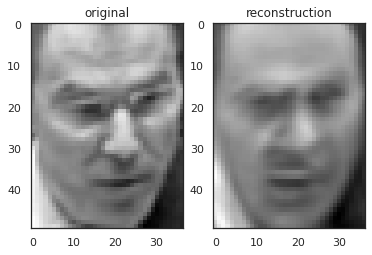

In [174]:
# reconstruct an image number 42:
from sklearn.decomposition import PCA
reconstructed_image = pca_img.inverse_transform(transformed_images[42])
# you can plot the reconstructed image like this: 
figure, axes = plt.subplots(1, 2)
axes[0].set_title("original")
axes[0].imshow(images_scaled[42].reshape((height_image, width_image)), cmap=plt.cm.gray)
axes[1].set_title("reconstruction")
axes[1].imshow(reconstructed_image.reshape((height_image, width_image)), cmap=plt.cm.gray)

plt.show()


**Q18** Plot the images a few of the new faces and make the selections based on both big and small cosine similarity values. Can you see the difference in quality?

In [ ]:
# didn't understand what to do ()

**A18** (your answer also here)

#### Different levels of approximation

**Q19** Consider using 5, 10, 50, 100, and 200 components for a random image. What can you say about the reconstruction quality?

image chosen:  492 Donald Rumsfeld


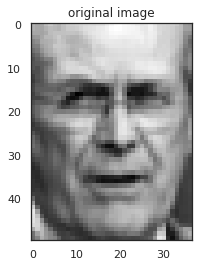

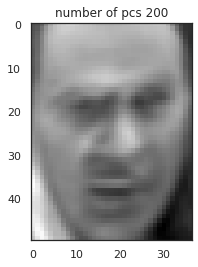

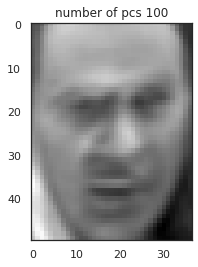

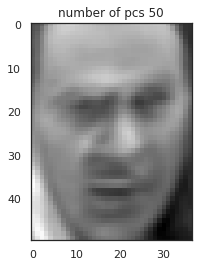

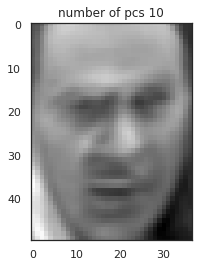

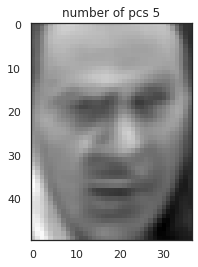

In [205]:
rand_image = np.random.randint(num_images)
print("image chosen: ", rand_image, people_by_image[rand_image])

plt.imshow(images_scaled[rand_image].reshape((height_image, width_image)), cmap=plt.cm.gray)
plt.title("original image")
plt.show()

sizes = [200, 100, 50, 10, 5]

reconstructed_images = []

for n_pcs in sizes:
    
    # fill in: get the reconstructed image
    
    plt.imshow(reconstructed_image.reshape((height_image, width_image)), cmap=plt.cm.gray)
    plt.title("number of pcs " + str(n_pcs))
    plt.show()
    



```
# This is formatted as code
```

**A19** Avec l'exemple que vous avez introduits, on peut dire que changer le nombre de composantes principales entre 5 et 200, n'améliore surtout pas la qualité de l'image.

Pour des raisons d'optimisation on peut penser à garder que les 5 composantes pour une tache basique.

#### Which axes are the most important?

Let us look at which axes were the most important for this particular image. Remember the squared cosine similarity? Use that to find the axes:

In [ ]:
# I'll run the one with 50 pcs again, so that we can see a bit more than 5 first components (that was run last)
pca_img2 = PCA(50)
transformed_images = pca_img2.fit_transform(images_scaled)

# use the my_cos_fun defined above:

projection_qualities = my_cos_fun(images_scaled, transformed_images)

print(projection_qualities[rand_image, :])
axes_order = np.argsort(-projection_qualities[rand_image, :])
print(axes_order)

Let's plot the corresponding eigenfaces (principal components)

In [ ]:
figure, axes = plt.subplots(3, 4)
for ll in range(3):
    for cc in range(4):
        numero_axe = axes_order[ll * 4 + cc]
        axes[ll][cc].set_title("axis " + str(numero_axe))
        axes[ll][cc].imshow(pca_img2.components_[numero_axe, :].reshape((height_image, width_image)), cmap=plt.cm.gray)

plt.show() 

**Q20** Any comments?

**A20**